# Emotional and Linguistic Framing of Digital Detox

### Notebook 7: Visualisation

Purpose:
- Visualise trends, topic heatmaps, PCA, sentiment over time

In [1]:
# required packages
!pip install pandas matplotlib seaborn plotly

# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
!pip install textblob
from textblob import TextBlob
from sklearn.decomposition import PCA


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [8]:
# load dfs
df_final_with_sentiment = pd.read_csv('df_vad_weighted_with_sentiment.csv')
df_vad_pca = pd.read_csv('df_vad_pca.csv')

In [9]:
detox_df = pd.read_csv('/home/jovyan/XXX/Back up/XXX/detox_with_topics.csv')
control_df = pd.read_csv('/home/jovyan/XXX/Back up/XXX/control_with_topics.csv')
combined_df = pd.concat([detox_df, control_df], ignore_index=True)

#### Heatmap: VAD by Topic & Group

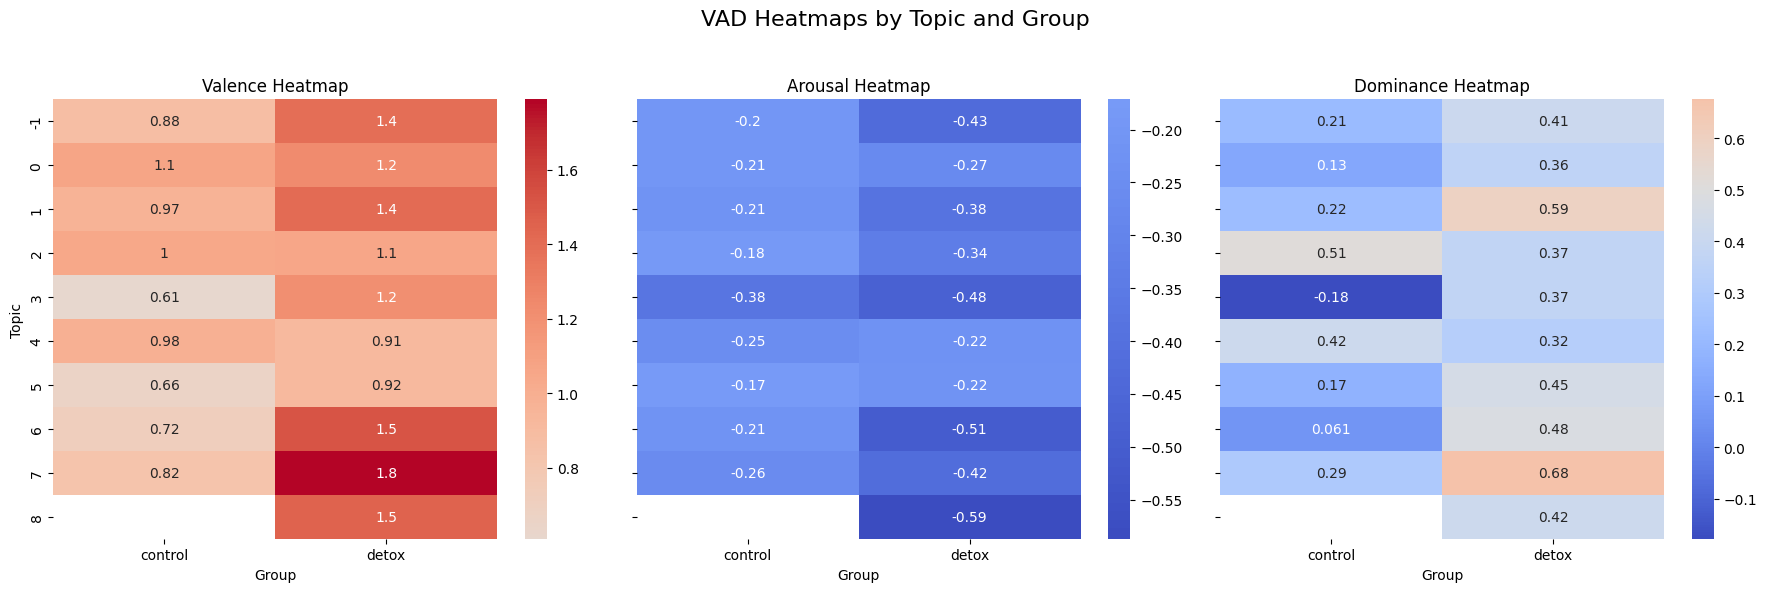

In [10]:
Bothma, J. (2024, December 13). Seaborn Heatmaps: A Guide to Data Visualization. https://www.datacamp.com/tutorial/seaborn-heatmaps

# group the data to get mean VAD scores by topic and group
topic_vad = df_final_with_sentiment.groupby(['topic', 'label'])[['valence', 'arousal', 'dominance']].mean().reset_index()

# create subplots for valence, arousal, and dominance heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# heatmap for calence
valence_data = topic_vad.pivot(index='topic', columns='label', values='valence')
sns.heatmap(valence_data, annot=True, cmap='coolwarm', center=0.5, ax=axes[0])
axes[0].set_title('Valence Heatmap')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Topic')

# heatmap for arousal
arousal_data = topic_vad.pivot(index='topic', columns='label', values='arousal')
sns.heatmap(arousal_data, annot=True, cmap='coolwarm', center=0.5, ax=axes[1])
axes[1].set_title('Arousal Heatmap')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('')

# heatmap for dominance
dominance_data = topic_vad.pivot(index='topic', columns='label', values='dominance')
sns.heatmap(dominance_data, annot=True, cmap='coolwarm', center=0.5, ax=axes[2])
axes[2].set_title('Dominance Heatmap')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('')

# show layout with title
plt.suptitle('VAD Heatmaps by Topic and Group', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Findings: The VAD heatmap reveals that digital detox topics show higher positivity, emotional intensity, and control than general Reddit posts. Topic 2 stands out with the strongest positivity and dominance, indicating empowered, successful detox experiences unique to this discourse. Overall, the analysis highlights distinct emotional themes reflecting a journey from struggle to empowerment in detox conversations.

#### PCA of Weighted VAD Scores

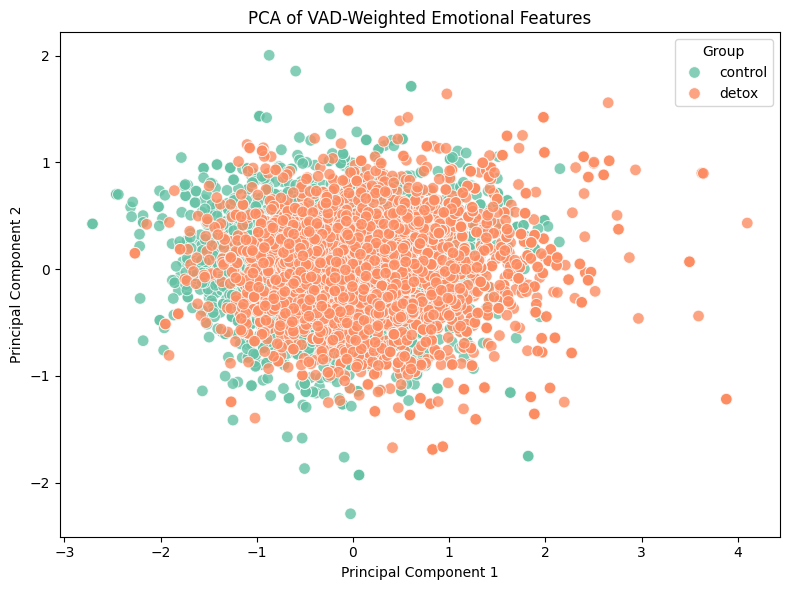

In [3]:
# load PCA results
df = pd.read_csv('df_vad_pca.csv')

# create scatter plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='label', palette='Set2', s=70, alpha=0.8)
plt.title("PCA of VAD-Weighted Emotional Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Group')
plt.tight_layout() 
plt.show()

Findings: PCA reveals clear emotional-linguistic distinctions between detox and control posts. Control content clusters tightly around the centre, indicating a more uniform emotional tone. In contrast, detox posts are more widely dispersed, reflecting a broader emotional range and more extreme affective states.

The most emotionally intense outliers are almost exclusively detox posts, often corresponding to personal breakthrough or transformation narratives.

These patterns support my hypothesis that digital detox discourse occupies a distinct, emotionally richer space, highlighting its potential for effective classification based on emotional language.

### Keyword Frequencies 

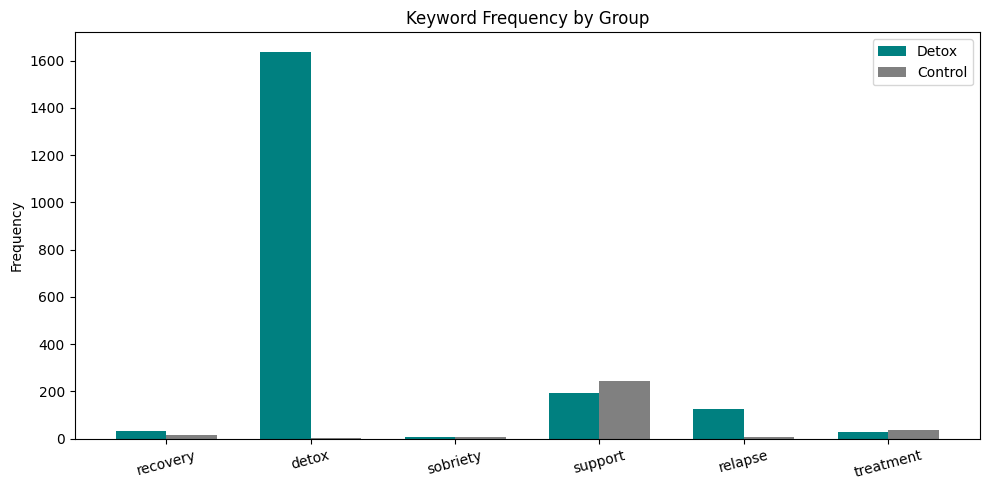

In [8]:
Chia, A. (2024, July 17). Python Boxplots: A comprehensive guide for beginners. https://www.datacamp.com/tutorial/python-boxplots

keywords = ["recovery", "detox", "sobriety", "support", "relapse", "treatment"]

detox_counts = []
control_counts = []

for keyword in keywords:
    detox_counts.append(detox_df['body'].str.contains(keyword, case=False, na=False).sum())
    control_counts.append(control_df['body'].str.contains(keyword, case=False, na=False).sum())

x = np.arange(len(keywords))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, detox_counts, width, label='Detox', color='teal')
bars2 = ax.bar(x + width/2, control_counts, width, label='Control', color='gray')

ax.set_ylabel('Frequency')
ax.set_title('Keyword Frequency by Group')
ax.set_xticks(x)
ax.set_xticklabels(keywords, rotation=15)
ax.legend()
plt.tight_layout()
plt.show()

This supports Hypothesis 2: wellness/self-reflective language is unique to digital detox discourse.

### World Clouds

  Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (547 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


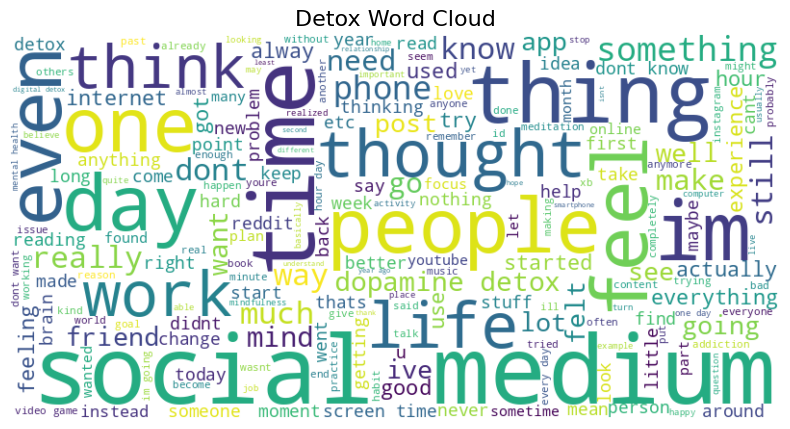

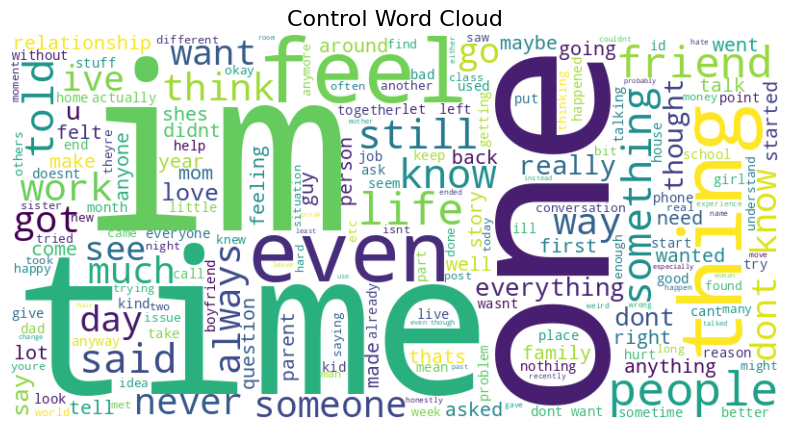

In [9]:
Vu, D. (2023, February 23). Generating WordClouds in Python Tutorial. https://www.datacamp.com/tutorial/wordcloud-python

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Choose 'body' or 'clean_body' depending on preprocessing
for label, df in [('Detox', detox_df), ('Control', control_df)]:
    text = ' '.join(df['clean_body'].dropna().astype(str))  # use 'body' if 'clean_body' doesn't exist

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{label} Word Cloud', fontsize=16)
    plt.show()

Findings: 

Detox word cloud emphasises technology and digital habits, featuring words like "phone," "app," "internet," and "dopamine," along with time-related terms such as "day" and "year," reflecting discussions about digital wellness and behaviour change.

Control word cloud focuses on relationships and emotions, with words like "people," "friend," "life," and "feel," indicating conversations about social interactions and personal experiences.

Key differences:

- Technology versus relationships
- Behavioural change compared to social dynamics
- Specific compared to genera,l which is tobe  expected 

### Violin Plots

/tmp/ipykernel_271/4160121446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final_with_sentiment, x='label', y=var, palette='Set2', inner='quartile')


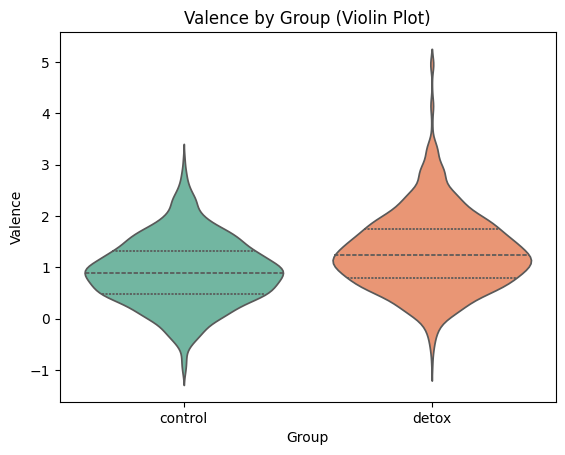

/tmp/ipykernel_271/4160121446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final_with_sentiment, x='label', y=var, palette='Set2', inner='quartile')


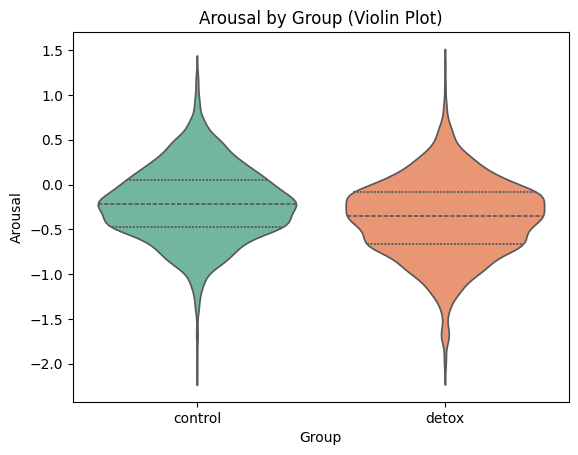

/tmp/ipykernel_271/4160121446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final_with_sentiment, x='label', y=var, palette='Set2', inner='quartile')


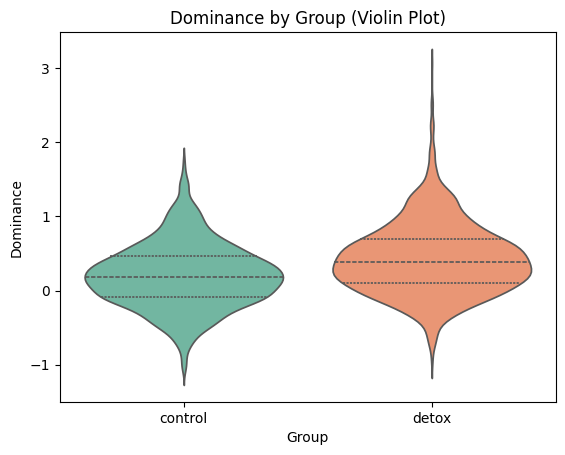

/tmp/ipykernel_271/4160121446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final_with_sentiment, x='label', y=var, palette='Set2', inner='quartile')


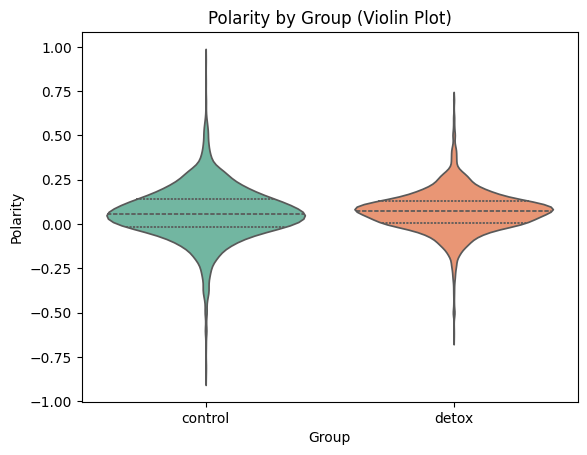

/tmp/ipykernel_271/4160121446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final_with_sentiment, x='label', y=var, palette='Set2', inner='quartile')


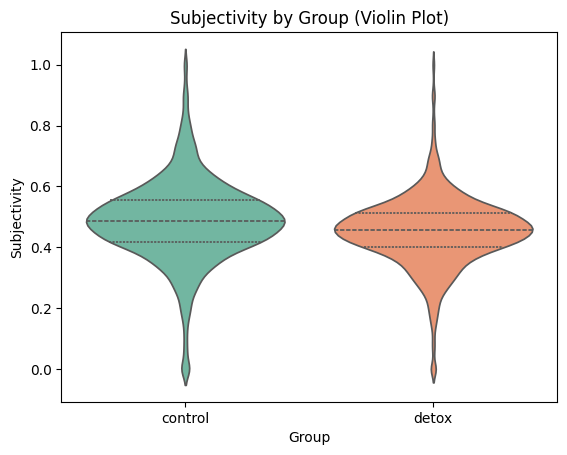

In [10]:
https://campus.datacamp.com/courses/visualization-best-practices-in-r/comparing-distributions?ex=8

for var in variables:
    sns.violinplot(data=df_final_with_sentiment, x='label', y=var, palette='Set2', inner='quartile')
    plt.title(f"{var.capitalize()} by Group (Violin Plot)")
    plt.xlabel("Group")
    plt.ylabel(var.capitalize())
    plt.show()

These plots compare emotional language between control and detox groups:

- Valence (Positivity): detox group uses slightly more positive language
- Arousal (Intensity): both groups show similar emotional intensity
- Dominance (Control): detox group expresses more sense of control
- Polarity (Sentiment): nearly identical between groups
- Subjectivity (Personal tone): control group uses slightly more personal language
